# Racial Segragation in US citiesReport
Vivaan Bhandari
44
Div B

In [1]:
#project set up
import pandas as pd 

In [2]:
#for data which is inside the folder type the folder names and acces it basically its adress 
chicago_df = pd.read_csv("data/data/prepped/chicago_race.csv")
#pritning duh
chicago_df.head(5)

,GEOID,GEO.display.label,pop,pop.white,pop.not.white,pct.white,pct.not.white
0,17031010201,17031010201,6450,2312,4138,0.358450,0.641550
1,17031010202,17031010202,2818,1237,1581,0.438964,0.561036
2,17031010300,17031010300,6236,3267,2969,0.523894,0.476106
3,17031010400,17031010400,5042,3341,1701,0.662634,0.337366
4,17031010503,17031010503,2290,1452,838,0.634061,0.365939


# Diversity Ratio 

In [3]:
total_white_people = chicago_df["pop.white"].sum()
total_not_white_people = chicago_df["pop.not.white"].sum()
diversity_ratio = total_white_people/total_not_white_people

print ("There are", total_white_people,"white people")
print ("There are", total_not_white_people,"not white people")
print ("The diversity ratio is", diversity_ratio)


There are 2513996 white people
There are 2134618 not white people
The diversity ratio is 1.1777264128757463


In [4]:
#total minority population 
total_minority_pop = chicago_df["pop.not.white"].sum()

#calculating the interaction index 
chicago_df["interaction_index"] = (chicago_df["pop.not.white"]/total_minority_pop) * (chicago_df["pop.white"]/chicago_df["pop"])

chicago_df

,GEOID,GEO.display.label,pop,pop.white,pop.not.white,pct.white,pct.not.white,interaction_index
0,17031010201,17031010201,6450,2312,4138,0.358450,0.641550,0.000695
1,17031010202,17031010202,2818,1237,1581,0.438964,0.561036,0.000325
2,17031010300,17031010300,6236,3267,2969,0.523894,0.476106,0.000729
3,17031010400,17031010400,5042,3341,1701,0.662634,0.337366,0.000528
4,17031010503,17031010503,2290,1452,838,0.634061,0.365939,0.000249
...,...,...,...,...,...,...,...,...
1214,18089030700,18089030700,2064,534,1530,0.258721,0.741279,0.000185
1215,18089030800,18089030800,4272,1513,2759,0.354167,0.645833,0.000458
1216,18089030900,18089030900,3575,1097,2478,0.306853,0.693147,0.000356
1217,18089031000,18089031000,1560,210,1350,0.134615,0.865385,0.000085


In [5]:
interaction_index_of_chicago = chicago_df["interaction_index"].sum()
interaction_index_of_chicago

0.33621530101878605

# Interaction Index of all the cities 

In [6]:
import os 

In [7]:
city_file_name_list = os.listdir("data/data/prepped/")
city_file_name_list

['baltimore_race.csv',
 'charleston_race.csv',
 'chicago_race.csv',
 'columbus_race.csv',
 'dayton_race.csv',
 'denver_race.csv',
 'kc_race.csv',
 'memphis_race.csv',
 'milwaukee_race.csv',
 'ok_city_race.csv',
 'pittsburgh_race.csv',
 'st_louis_race.csv',
 'syracuse_race.csv',
 'wichita_race.csv']

In [8]:
def print_interaction_index():
    #getting a list of the all the city file names 
    city_file_name_list = os.listdir("data/data/prepped/")
    
    #for loop timeeee
    #for each city in file 
    for city_file_name in city_file_name_list:
        
        #import the city data 
        city_df = pd.read_csv("data/data/prepped/"+city_file_name)
        
        #calcutating the total minortiy population 
        total_minority_pop = city_df["pop.not.white"].sum()
        
        #calculating the interaction index
        city_df["interaction_index"] = (city_df["pop.not.white"]/total_minority_pop) * (city_df["pop.white"]/city_df["pop"])
        
        interaction_index_of_city = city_df["interaction_index"].sum()
        
        print(city_file_name.replace("_race.csv" , "").title(),":", interaction_index_of_city)
        
        

In [9]:
print_interaction_index()

Baltimore : 0.21709369506053244
Charleston : 0.5181057467459754
Chicago : 0.33621530101878605
Columbus : 0.5370267887655849
Dayton : 0.5072699799837672
Denver : 0.6852801607490661
Kc : 0.5806694539317967
Memphis : 0.4811953882784695
Milwaukee : 0.40424141689420257
Ok_City : 0.6134720843684374
Pittsburgh : 0.602965687041454
St_Louis : 0.4204527865157873
Syracuse : 0.606170839777443
Wichita : 0.639562420122306


In [10]:
def print_isolation_index():
    #getting a list of the all the city file names 
    city_file_name_list = os.listdir("data/data/prepped/")
    
    #for loop timeeee
    #for each city in file 
    for city_file_name in city_file_name_list:
        
        #import the city data 
        city_df = pd.read_csv("data/data/prepped/"+city_file_name)
        
        #calcutating the total minortiy population 
        total_minority_pop = city_df["pop.not.white"].sum()
        
        #calculating the interaction index
        city_df["isolation_index"] = (city_df["pop.not.white"]/total_minority_pop) * (city_df["pop.not.white"]/city_df["pop"])
        
        isolation_index_of_city = city_df["isolation_index"].sum()
        
        print(city_file_name.replace("_race.csv" , "").title(),":", isolation_index_of_city)
        

In [11]:
print_isolation_index()

Baltimore : 0.7829063049394676
Charleston : 0.4818942532540245
Chicago : 0.663784698981214
Columbus : 0.4629732112344152
Dayton : 0.4927300200162328
Denver : 0.3147198392509339
Kc : 0.41933054606820336
Memphis : 0.5188046117215305
Milwaukee : 0.5957585831057974
Ok_City : 0.3865279156315625
Pittsburgh : 0.39703431295854597
St_Louis : 0.5795472134842126
Syracuse : 0.393829160222557
Wichita : 0.3604375798776941


# metrics getting the thing for each city (isolation index diversity etc etc by using a for loop

In [12]:
def get_interaction_index(city_df):
    #calcutating the total minortiy population 
    total_minority_pop = city_df["pop.not.white"].sum()
        
    #calculating the interaction index
    city_df["interaction_index"] = (city_df["pop.not.white"]/total_minority_pop) * (city_df["pop.white"]/city_df["pop"])
        
    interaction_index_of_city = city_df["interaction_index"].sum()
    
    return interaction_index_of_city

In [13]:
def get_isolation_index(city_df):
    #calcuting interaction index
    city_df["isolation_index"] = (city_df["pop.not.white"]/total_minority_pop) * (city_df["pop.not.white"]/city_df["pop"])
        
    isolation_index_of_city = city_df["isolation_index"].sum()
        
    return isolation_index_of_city

In [14]:
def get_diversity_ratio(city_df):
    total_white_people = city_df["pop.white"].sum()
    total_not_white_people = city_df["pop.not.white"].sum()
    diversity_ratio = total_white_people/total_not_white_people
    return diversity_ratio

In [15]:
def get_metrics_df():
    #getting a list of the all the city file names 
    city_file_name_list = os.listdir("data/data/prepped/")
    #making an empty data frame 
    metrics_df = pd.DataFrame(columns=["city","interaction_index","isolation_index","diversity_ratio"])
    
    ###############################################################
    #for loop timeeee
    #for each city in file 
    for city_file_name in city_file_name_list:
        
        #city df line 
        city_df = pd.read_csv("data/data/prepped/"+city_file_name)
        #new row 
        new_row = {"city": city_file_name.replace("_race.csv" ,"").title(),
                  "interaction_index":get_interaction_index(city_df),
                  "isolation_index":get_isolation_index(city_df),
                  "diversity_ratio" : get_diversity_ratio(city_df)}
        #madding new row metrics thing 
        metrics_df = metrics_df.append(new_row,ignore_index = True )
        
        
        
        
    return metrics_df
        

In [16]:
get_metrics_df()

,city,interaction_index,isolation_index,diversity_ratio
0,Baltimore,0.217094,0.048177,0.634657
1,Charleston,0.518106,0.346063,2.051064
2,Chicago,0.336215,0.663785,1.177726
3,Columbus,0.537027,0.084045,2.504501
4,Dayton,0.507270,0.040816,4.056282
5,Denver,0.685280,0.089823,3.744329
6,Kc,0.580669,0.090912,3.860438
7,Memphis,0.481195,0.314499,3.794997
8,Milwaukee,0.404241,0.124360,2.770268
9,Ok_City,0.613472,0.063779,2.534255


<AxesSubplot:xlabel='diversity_ratio', ylabel='interaction_index'>

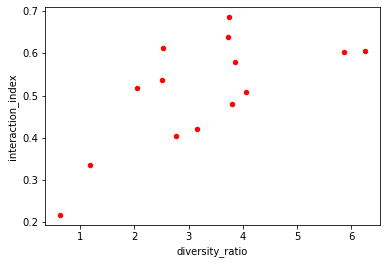

In [17]:
#investigating the relationship bw the diversity ratio and interaction index (scatter chart)
metrics_df = get_metrics_df()
metrics_df.plot.scatter(x='diversity_ratio',y='interaction_index' , c= 'Red')

In [18]:
metrics_df.to_csv("metrics_df.csv")